## Problem statement:
Build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [2]:
#mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#install Augmentor
!pip install Augmentor

In [4]:
#import libraries
import pathlib
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import load_img

import Augmentor

In [5]:
# setting the path for train and test images
trainingDataPath = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Train/")
testDataPath = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Test/")

In [6]:
# Count the number of images in Train and Test directories
# Use glob to retrieve files and pathnames

#Training Set Image count
trainingImageCount = len(list(trainingDataPath.glob('*/*.jpg')))
print(trainingImageCount)

#Test Set Image count
testImageCount = len(list(testDataPath.glob('*/*.jpg')))
print(testImageCount)

2241
118


**Data Visualization**

Found 2241 files belonging to 9 classes.


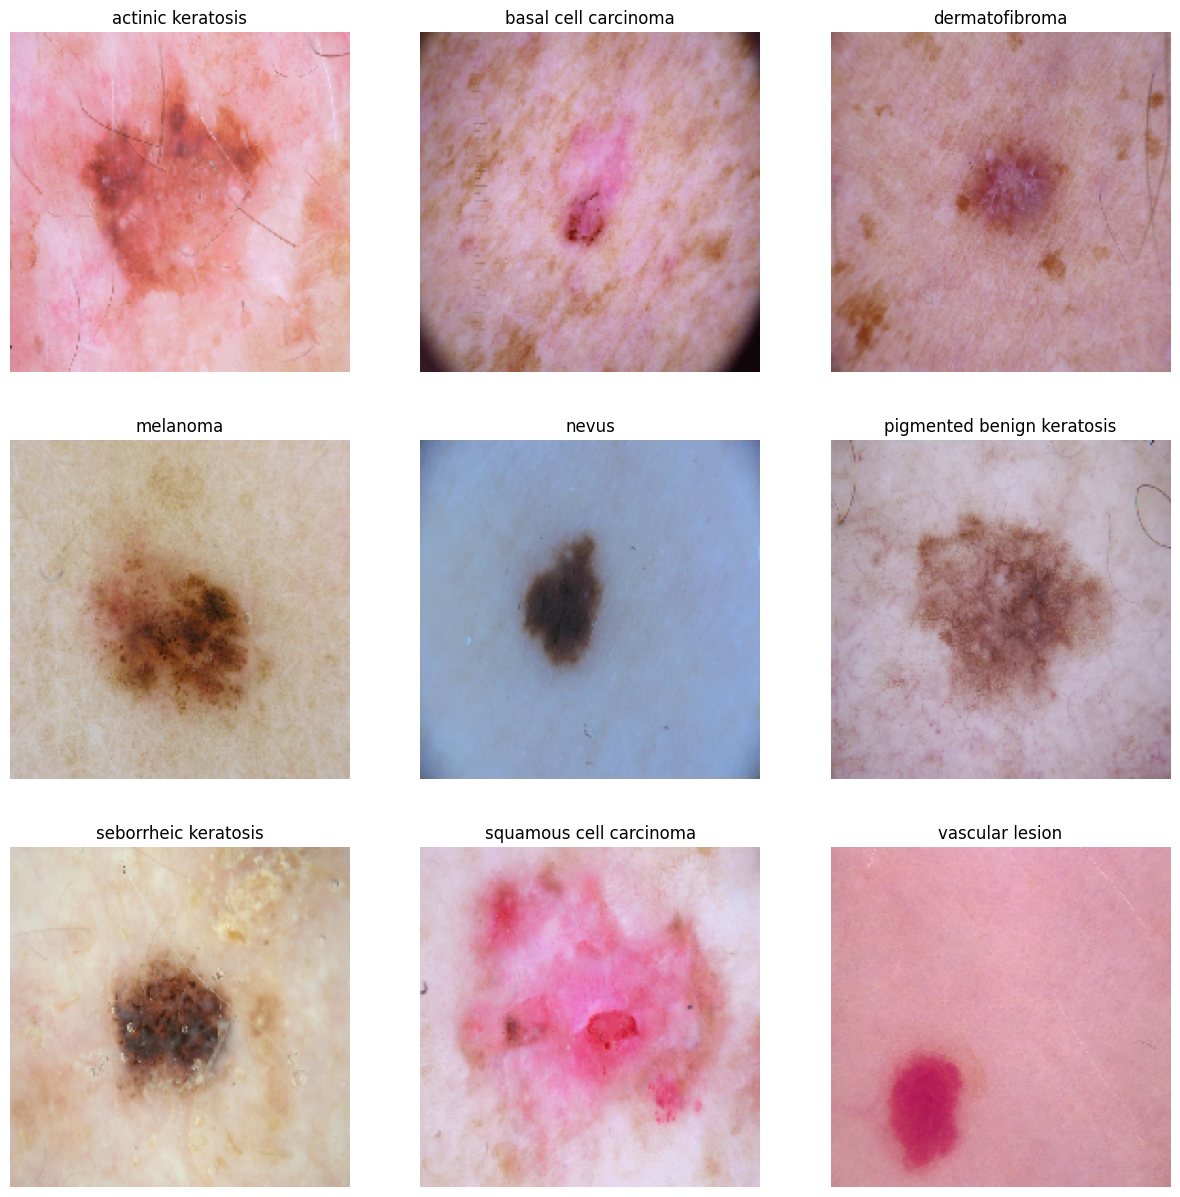

In [7]:
#Display one instance of each class present

datasetTrain = tf.keras.preprocessing.image_dataset_from_directory(trainingDataPath,batch_size=32,image_size=(180,180),
                                                                    label_mode='categorical',seed=123)

#get all class names
classNames = datasetTrain.class_names

#Dictionary for path of image as per the class
filepathDict = {}

for c in classNames:
    filepathDict[c] = list(map(lambda x:str(trainingDataPath)+'/'+c+'/'+x,os.listdir(str(trainingDataPath)+'/'+c)))

#Images
plt.figure(figsize=(15,15))
index = 0
for c in classNames:
    path_list = filepathDict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

**Visualize distribution of classes in the training dataset.**

In [8]:
def class_distribution_count(directory):

    #count the number of images in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #Class Names
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return image count and classes.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'Image Count'])

df = class_distribution_count(trainingDataPath)
df

,Class,Image Count
0,vascular lesion,139
1,melanoma,438
2,actinic keratosis,114
3,nevus,357
4,squamous cell carcinoma,181
5,dermatofibroma,95
6,seborrheic keratosis,77
7,pigmented benign keratosis,464
8,basal cell carcinoma,376


<Axes: xlabel='Image Count', ylabel='Class'>

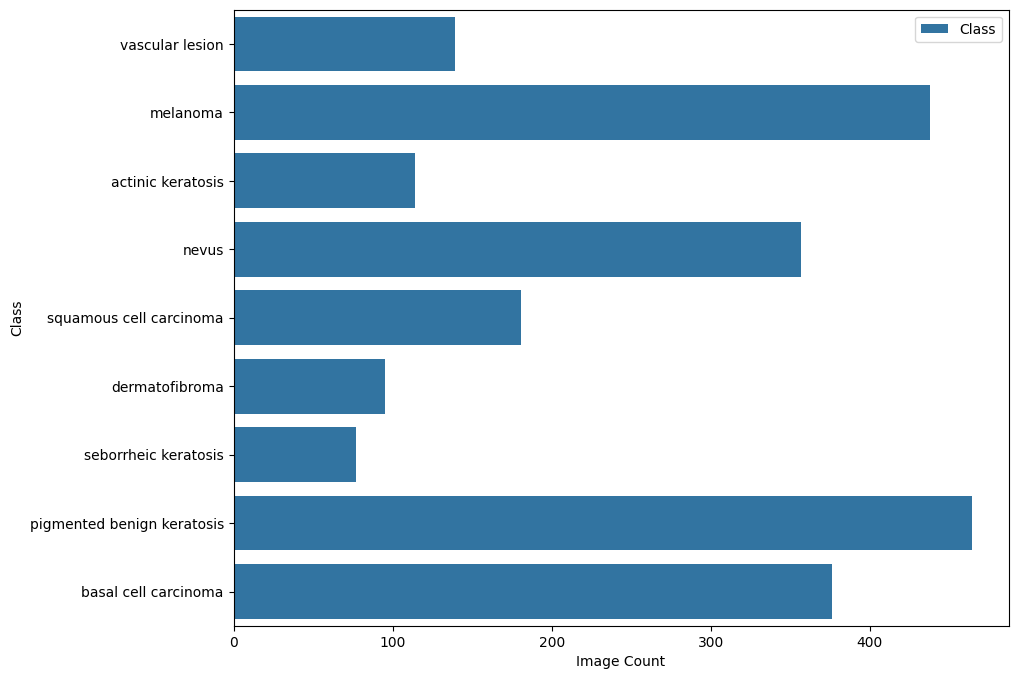

In [9]:
#Graph for the number of images in each class
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="Image Count", y="Class", data=df,
            label="Class")

In [10]:
#Using Augmentor to add 500 samples across all classes
trainingDataSetPath="/content/gdrive/MyDrive/CNN_assignment/Train/"
for i in classNames:
    p = Augmentor.Pipeline(trainingDataSetPath + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E03E6F211B0>: 100%|██████████| 500/500 [00:19<00:00, 25.10 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E04909E0490>: 100%|██████████| 500/500 [00:18<00:00, 26.55 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E03F414EBC0>: 100%|██████████| 500/500 [00:19<00:00, 25.23 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=965x649 at 0x7E03F40EAD40>: 100%|██████████| 500/500 [01:25<00:00,  5.84 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7E03D8937940>: 100%|██████████| 500/500 [01:20<00:00,  6.18 Samples/s]


Initialised with 464 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E03E6F23220>: 100%|██████████| 500/500 [00:18<00:00, 26.52 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7E03D89BE890>: 100%|██████████| 500/500 [00:40<00:00, 12.40 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E03F496C130>: 100%|██████████| 500/500 [00:18<00:00, 26.95 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7E03D8902A40>: 100%|██████████| 500/500 [00:20<00:00, 24.14 Samples/s]


In [11]:
#Count number of images generated by Augmentor
trainingImageCount = len(list(trainingDataPath.glob('*/output/*.jpg')))
print(trainingImageCount)

4500


**Model Building**

In [12]:
# train dataset
trainDataset = tf.keras.preprocessing.image_dataset_from_directory(trainingDataPath, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)


Found 6741 files belonging to 9 classes.
Using 5393 files for training.


In [13]:
# validation dataset
validateTrainingDataset =tf.keras.preprocessing.image_dataset_from_directory(trainingDataPath,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 6741 files belonging to 9 classes.
Using 1348 files for validation.


In [14]:
autotune = tf.data.experimental.AUTOTUNE
trainDataset = trainDataset.cache().shuffle(1000).prefetch(buffer_size=autotune)
validateTrainingDataset = validateTrainingDataset.cache().prefetch(buffer_size=autotune)

In [15]:
#CNN Model

#Sequential creates models layer-by-layer
cnnModel = Sequential()

cnnModel.add(layers.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
cnnModel.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
cnnModel.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
cnnModel.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
cnnModel.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
cnnModel.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
cnnModel.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop
cnnModel.add(layers.Dropout(0.5))

#Flatten Layer
cnnModel.add(layers.Flatten())

#Dense Layer
cnnModel.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop
cnnModel.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function
cnnModel.add(layers.Dense(len(classNames),activation='softmax'))

cnnModel.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

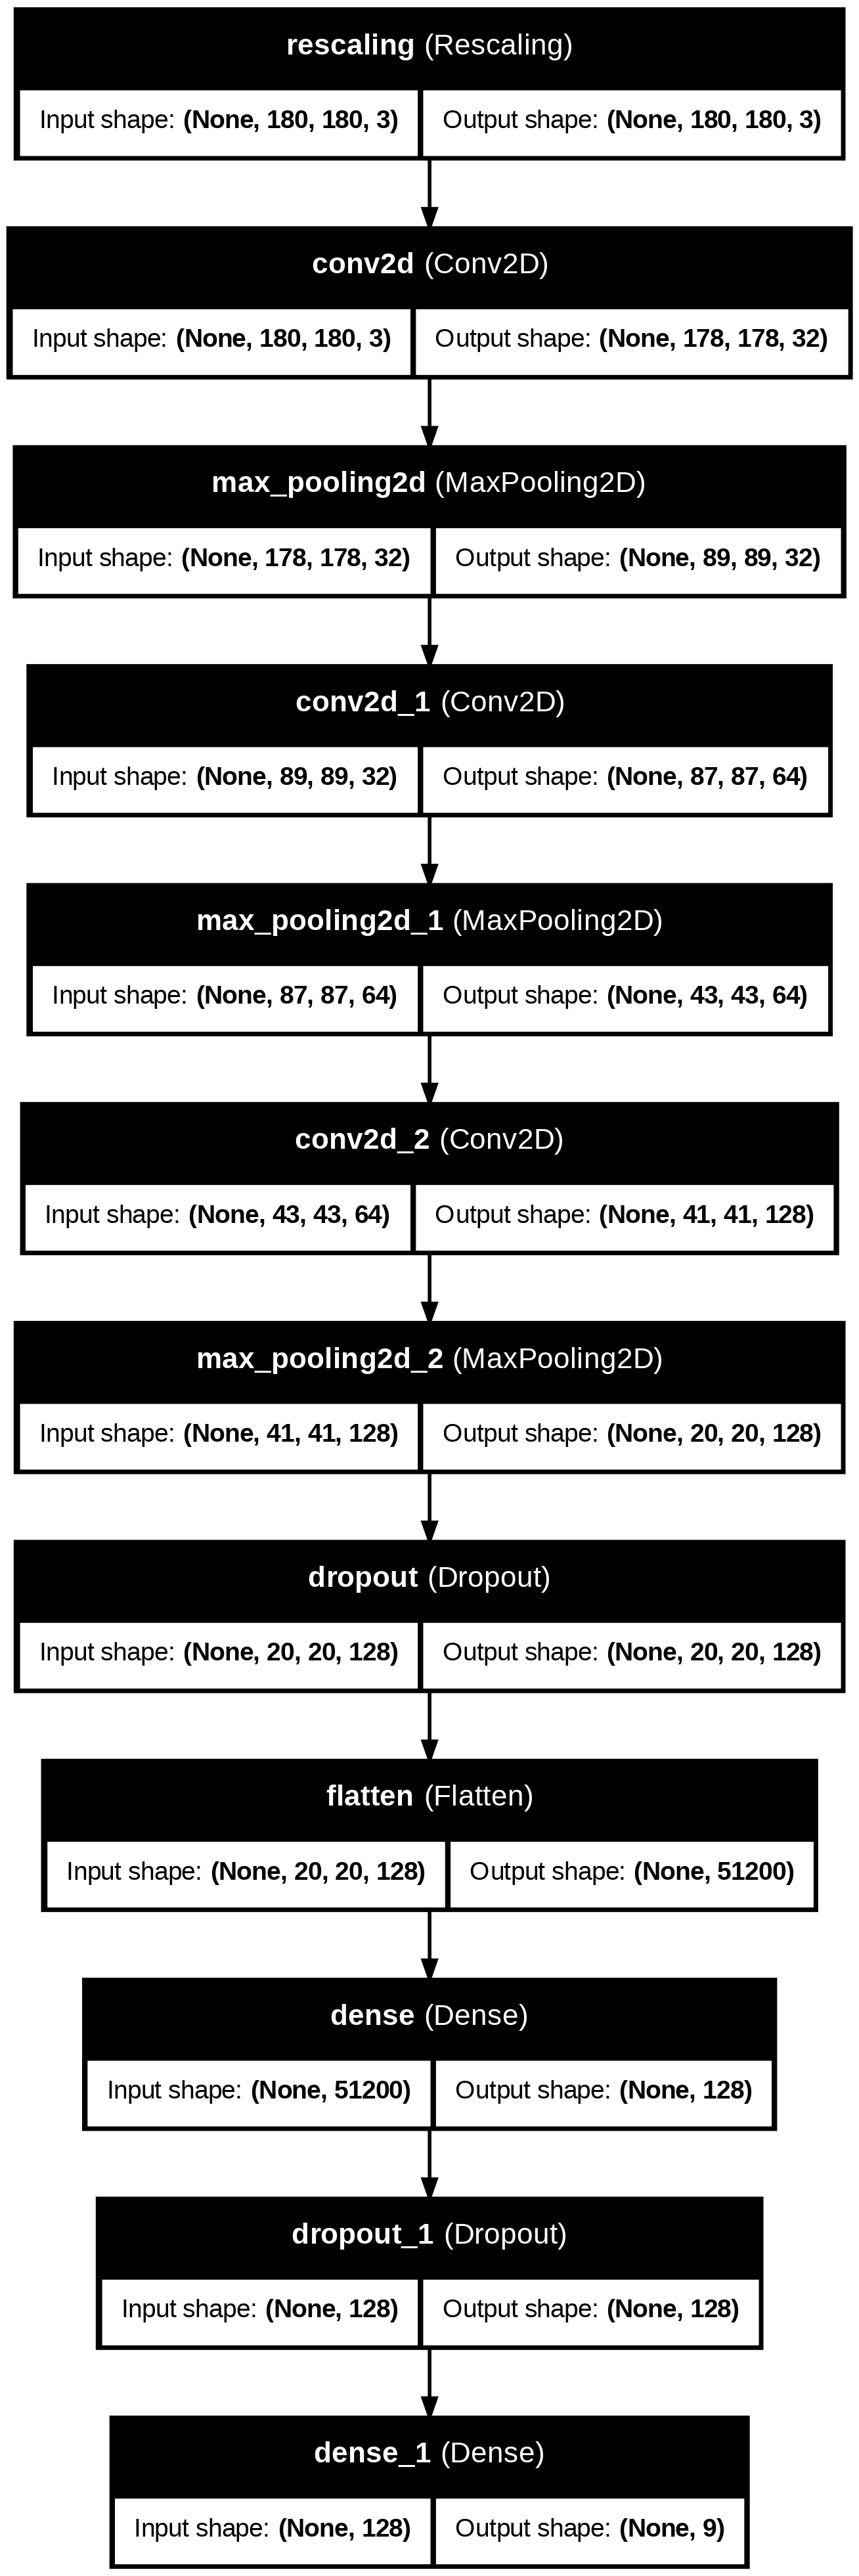

In [16]:
# vizualizing the model
from tensorflow.keras.utils import plot_model
plot_model(cnnModel, to_file='/content/gdrive/MyDrive/modelPlot.png', show_shapes=True, show_layer_names=True)

In [17]:
#Compile the Model
cnnModel.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])
modelCheckPoint = ModelCheckpoint("/content/gdrive/MyDrive/model.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
earlyStopTraining = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

In [18]:
# Train the model
epochs = 30
history = cnnModel.fit(trainDataset, validation_data=validateTrainingDataset, epochs=epochs,callbacks=[modelCheckPoint,earlyStopTraining])

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1925 - loss: 2.1413
Epoch 1: val_accuracy improved from -inf to 0.41320, saving model to /content/gdrive/MyDrive/model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 70s 173ms/step - accuracy: 0.1928 - loss: 2.1402 - val_accuracy: 0.4132 - val_loss: 1.5700
Epoch 2/30
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3892 - loss: 1.5861
Epoch 2: val_accuracy improved from 0.41320 to 0.47774, saving model to /content/gdrive/MyDrive/model.keras
169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.3893 - loss: 1.5857 - val_accuracy: 0.4777 - val_loss: 1.3357
Epoch 3/30
168/169 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4781 - loss: 1.3956
Epoch 3: val_accuracy did not improve from 0.47774
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.4781 - loss: 1.3956 - val_accuracy: 0.4711 - val_loss: 1.4516
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4974 - loss: 1.3277
Epoch 4: val_accuracy improved f

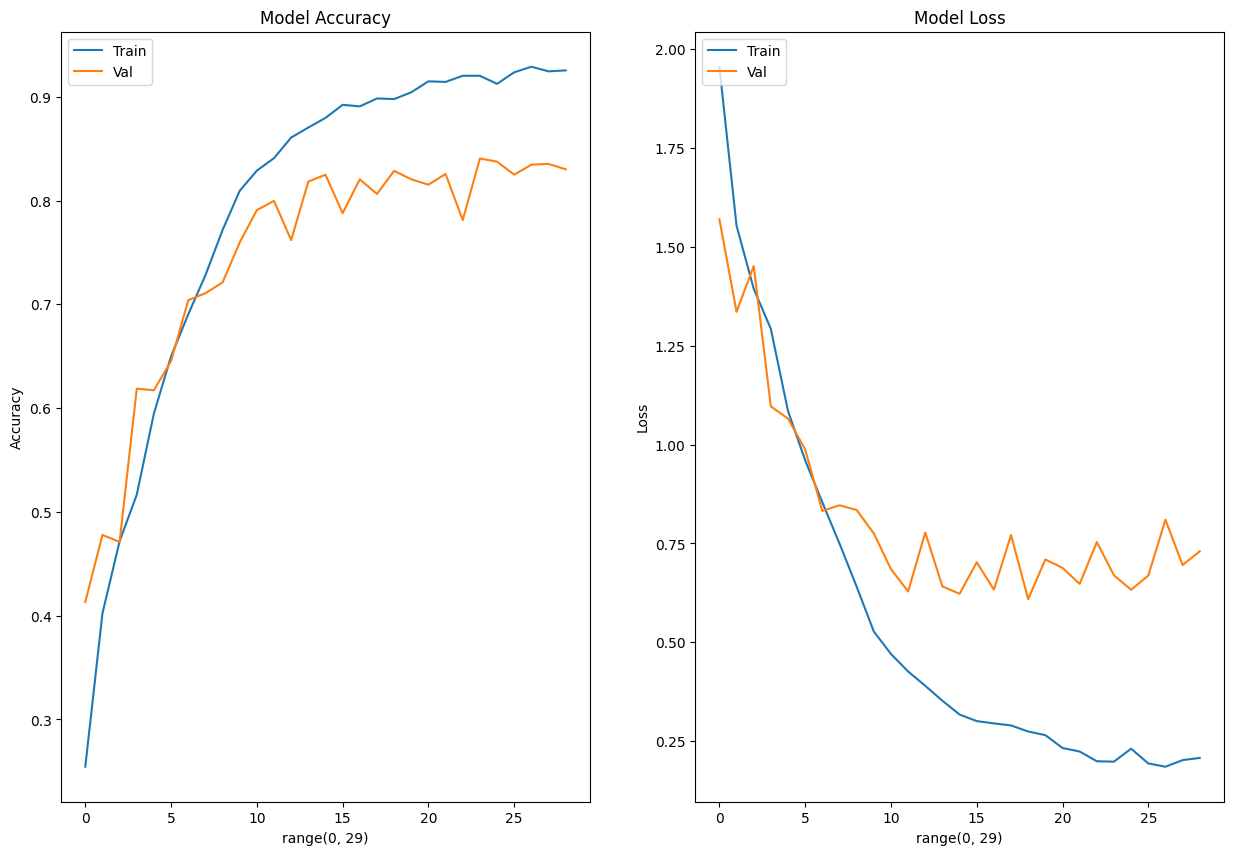

In [24]:
# Training curves

epochsRange = range(earlyStopTraining.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Model Accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel(epochsRange)
plt.legend(['Train', 'Val'], loc='upper left')

#Model Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel(epochsRange)
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


## Model Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Actual Class basal cell carcinoma
Predicted Class basal cell carcinoma


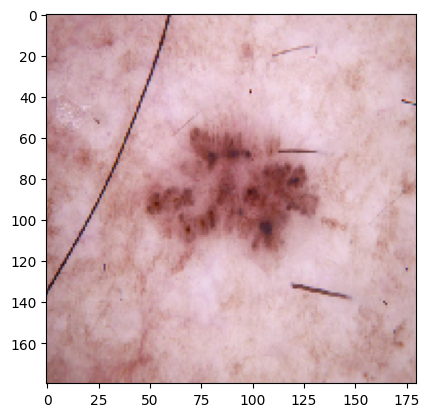

In [25]:
from glob import glob
testImagePath = os.path.join(testDataPath, classNames[1], '*')
testImage = glob(testImagePath)
testImage = load_img(testImage[-1],target_size=(180,180,3))
plt.imshow(testImage)
plt.grid(False)

imgTestSample = np.expand_dims(testImage,axis=0)
prediction = cnnModel.predict(imgTestSample)
prediction = np.argmax(prediction)
predictionClass = classNames[prediction]
print("Actual Class "+ classNames[1] +'\n'+ "Predicted Class "+predictionClass )